<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Deteksi_Anomali_dengan_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

#   Membuat Data Sintetis ---
# Buat data normal yang terdistribusi dalam dua gumpalan (blobs)
X_normal, y_normal = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# Buat beberapa data anomali yang lokasinya jauh dari data normal
X_outliers = np.random.RandomState(42).uniform(low=-6, high=6, size=(20, 2))

# Gabungkan data normal dan anomali
X = np.vstack([X_normal, X_outliers])

In [2]:
#   Inisialisasi & Latih Model ---
# contamination = perkiraan proporsi anomali dalam data (20 anomali / 320 total data)
model = IsolationForest(n_estimators=100, contamination=20/320, random_state=42)
model.fit(X)

IsolationForest(contamination=0.0625, random_state=42)

In [3]:
#   Prediksi Anomali ---
# Model akan memberi label 1 untuk data normal (inlier) dan -1 untuk anomali (outlier)
y_pred = model.predict(X)

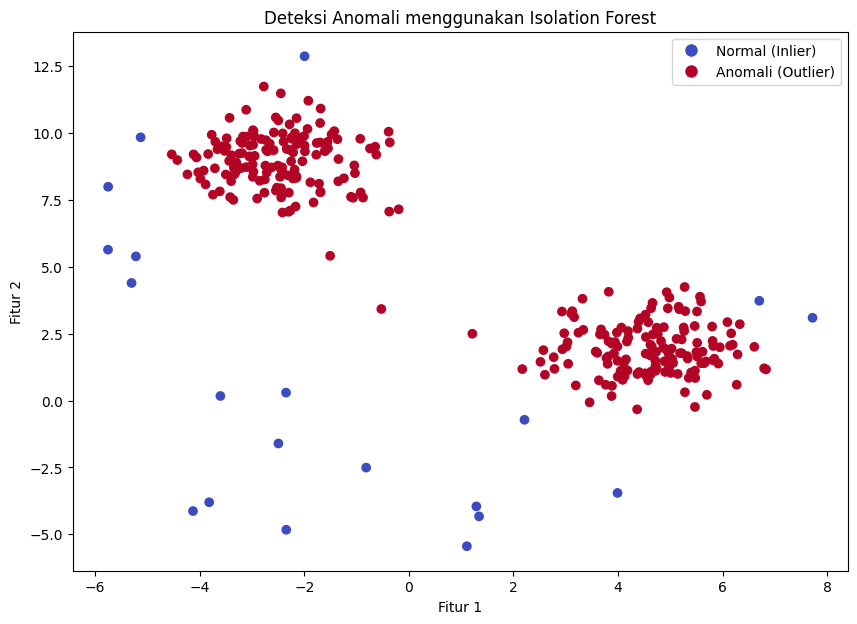

In [4]:
#   Visualisasi Hasil ---
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title('Deteksi Anomali menggunakan Isolation Forest')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
# Membuat legenda manual
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#3b4cc0', markersize=10, label='Normal (Inlier)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#b40426', markersize=10, label='Anomali (Outlier)')
])
plt.show()